In [1]:
import pandas as pd
import xarray as xr
import rioxarray
import numpy as np

In [2]:
def createid(df):        
    df['xposst'] = (df['x'] * 10000).apply('{:06.0f}'.format)
    df['yposst'] = (df['y'] * 10000).apply('{:06.0f}'.format)
    df['id'] = df['xposst']+df['yposst']
    df['id']=df['id'].astype(np.int64)
    df.drop(columns=['xposst', 'yposst'],inplace=True)

In [3]:
df=pd.read_csv("/home/lstam/Documents/daily_rasters/csv/20230630_norm_pred.csv")
dfun=pd.read_csv("/home/lstam/Documents/daily_rasters/csv/20230630.csv")
#df.rename(columns={'xu':'x', 'yu':'y'}, inplace=True)

In [4]:
createid(dfun)

In [5]:
dfun['id']

0         194770402300
1         194770402248
2         194770402197
3         194821402300
4         194821402248
              ...     
654106    282343363796
654107    282395364415
654108    282395363900
654109    282395363848
654110    282395363796
Name: id, Length: 654111, dtype: int64

In [13]:
dfm=df.merge(dfun, on='id')

In [14]:
dfm.rename(columns={'x_y':'lon', 'y_y':'lat'}, inplace=True)

In [16]:
#dfm.set_index(["y", "x"], inplace=True)
dfm.set_index(["lat", "lon"], inplace=True)

In [17]:
dfm

,,id,ypred0,ypred1,x_x,y_x,risk,dom_dir,dom_vel,res_max,dir_max,...,corine_gr1,corine_gr4,corine_gr5,corine_gr21,corine_gr22,corine_gr23,corine_gr24,corine_gr31,corine_gr32,corine_gr33
lat,lon,,,,,,,,,,,,,,,,,,,,,
40.229985,19.476980,194770402300,0.938307,0.061693,19.4770,40.2300,1,4.0,9.138572,9.138572,4.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
40.224831,19.476980,194770402248,0.942229,0.057771,19.4770,40.2248,1,4.0,9.138572,9.138572,4.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
40.219676,19.476980,194770402197,0.938997,0.061003,19.4770,40.2197,1,4.0,9.138572,9.138572,4.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
40.229985,19.482134,194821402300,0.922193,0.077807,19.4821,40.2300,1,4.0,9.138572,9.138572,4.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
40.224831,19.482134,194821402248,0.944567,0.055433,19.4821,40.2248,1,4.0,9.138572,9.138572,4.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36.379643,28.234317,282343363796,0.171330,0.828670,28.2343,36.3796,5,7.0,10.812889,10.812889,7.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0
36.441496,28.239472,282395364415,0.964579,0.035421,28.2395,36.4415,1,7.0,9.013441,9.013441,7.0,...,0.427523,0.0,0.572477,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
36.389952,28.239472,282395363900,0.911595,0.088405,28.2395,36.3900,1,7.0,10.812889,10.812889,7.0,...,0.958365,0.0,0.041635,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [18]:
ds = xr.Dataset.from_dataframe(dfm)

In [2]:
ds

NameError: name 'ds' is not defined

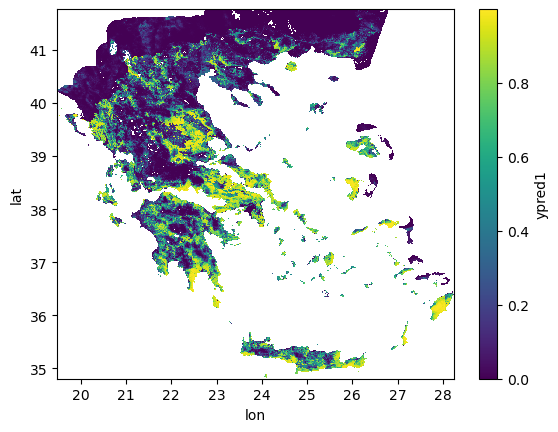

In [21]:
ds['ypred1'].plot()

In [34]:
ds.rio.write_crs(4326, inplace=True)

<xarray.Dataset>
Dimensions:        (y: 1337, x: 1701)
Coordinates:
  * y              (y) float64 34.81 34.81 34.82 34.82 ... 41.76 41.76 41.77
  * x              (x) float64 19.48 19.48 19.49 19.49 ... 28.23 28.23 28.24
    spatial_ref    int64 0
Data variables: (12/85)
    id             (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    ypred0         (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    ypred1         (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    x_x            (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    y_x            (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    risk           (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    ...             ...
    corine_gr22    (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    corine_gr23    (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    corine_gr24    (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    corine_gr31    (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    corine_gr32    (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    corine_gr33    (y, x) float64 nan nan nan nan nan ... nan nan nan nan nan

In [22]:
ds['risk'].rio.to_raster("/home/lstam/Documents/daily_rasters/tif/20230630_norm_pred_t1.tif")

MissingSpatialDimensionError: y dimension not found. 'rio.set_spatial_dims()' or using 'rename()' to change the dimension name to 'y' can address this. Data variable: risk